<a href="https://colab.research.google.com/github/Anand3074/Anand3074/blob/main/Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [4]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [5]:
fnames = get_image_files(path/'images')
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_01260.png')

In [6]:
(path/'labels').ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06810_P.png')

In [7]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [8]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

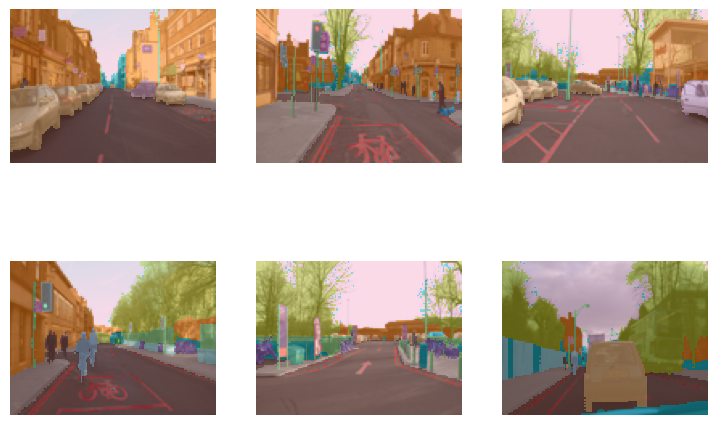

In [9]:
dls.show_batch(max_n=6)

In [10]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s]


epoch,train_loss,valid_loss,time
0,3.188832,2.542970,00:02


epoch,train_loss,valid_loss,time
0,1.913031,1.591992,00:01
1,1.655663,1.863611,00:01
2,1.535473,1.357602,00:01
3,1.392308,1.166175,00:01
4,1.250082,1.085817,00:01
5,1.145259,1.074286,00:01


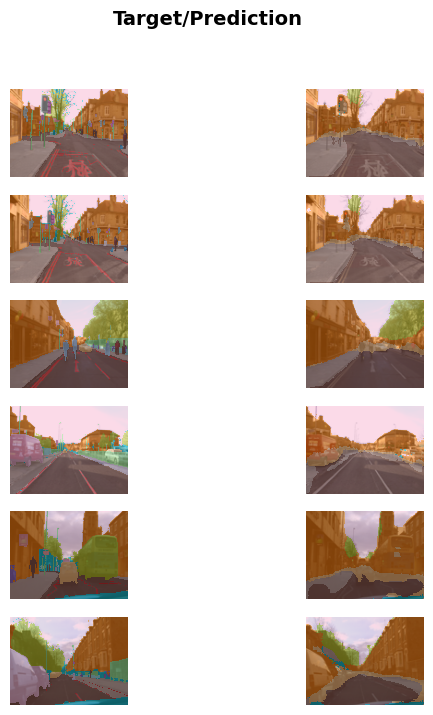

In [11]:
learn.show_results(max_n=6, figsize=(7,8))

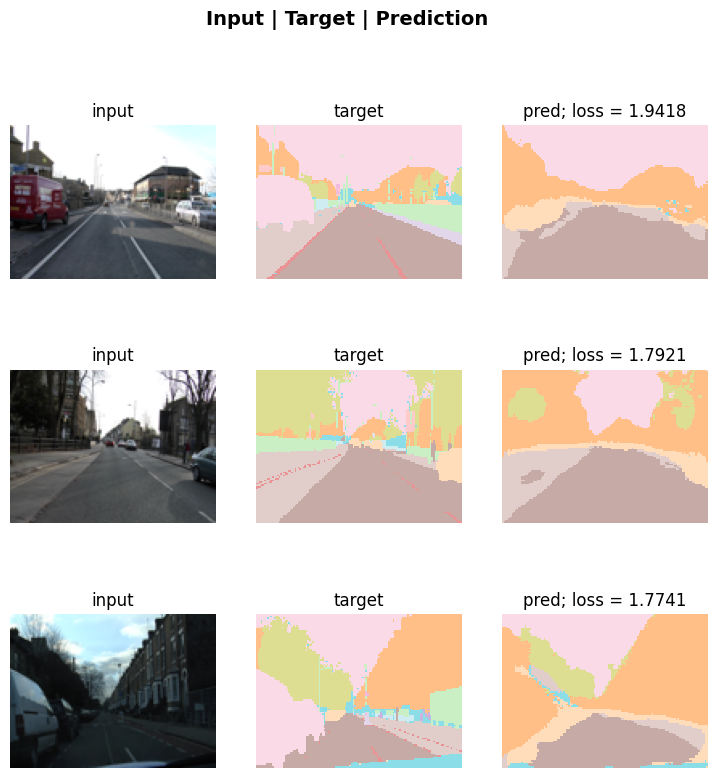

In [12]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

SuggestedLRs(valley=0.0003311311302240938)

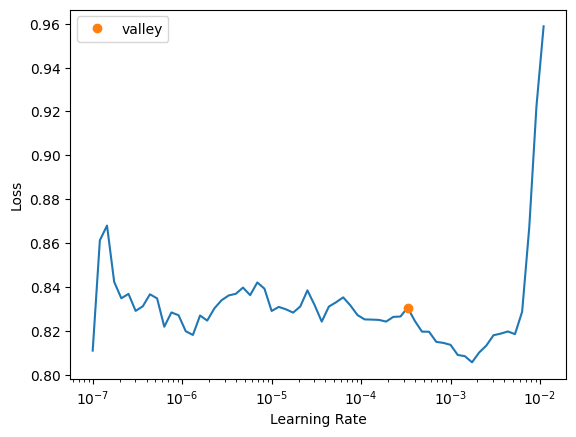

In [13]:
learn.lr_find()

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=1.3182567499825382e-06)


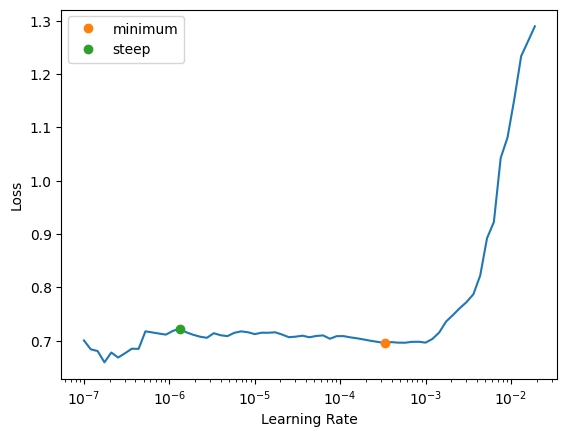

In [21]:
lr_min, lr_steep, *_ = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"SuggestedLRs(lr_min={lr_min}, lr_steep={lr_steep})")

In [17]:
learn.fine_tune(6, base_lr=1.2e-4)

epoch,train_loss,valid_loss,time
0,0.826217,1.032919,00:01


epoch,train_loss,valid_loss,time
0,0.800390,1.015305,00:01
1,0.789585,1.001777,00:01
2,0.775883,0.984532,00:01
3,0.763456,0.982279,00:01
4,0.752118,0.974710,00:01
5,0.742566,0.975025,00:01


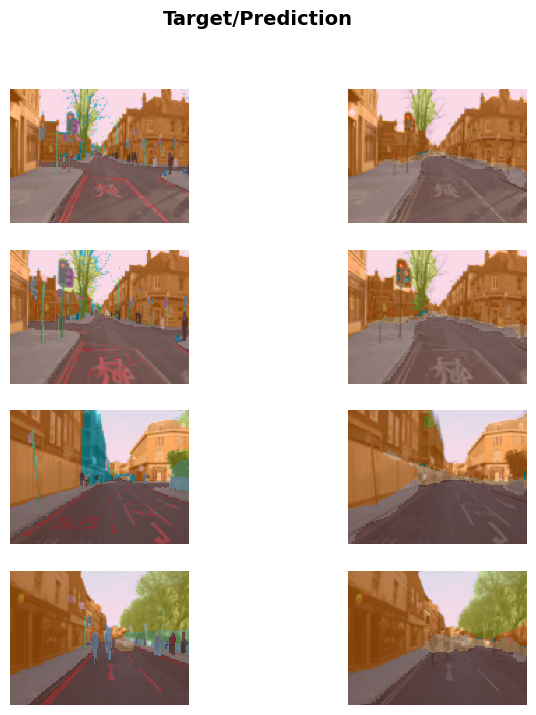

In [18]:
learn.show_results(max_n=4, figsize=(8, 8))

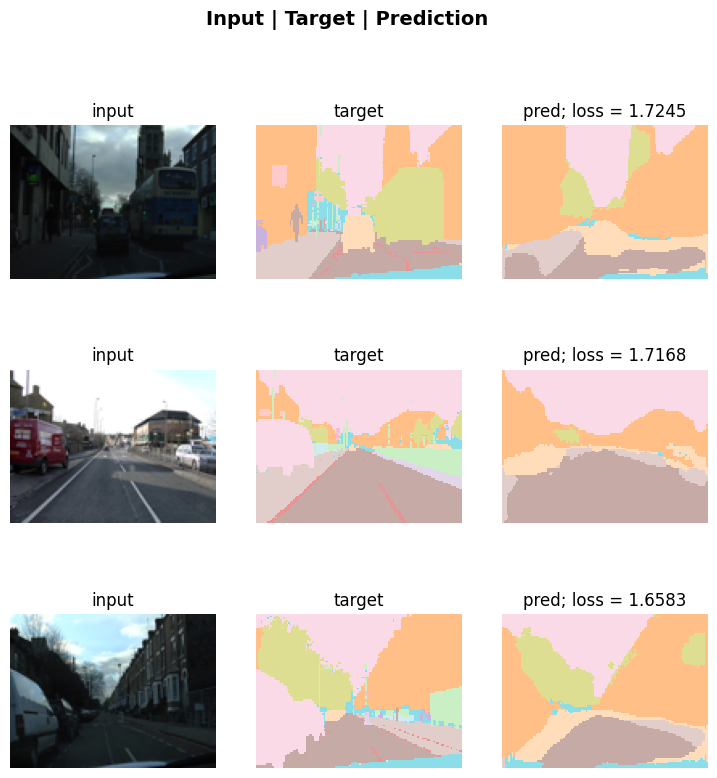

In [19]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

In [20]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    fnames=fnames,
    label_func=label_func,
    codes=codes,
    bs=8,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),)

SuggestedLRs(valley=0.00019054606673307717)

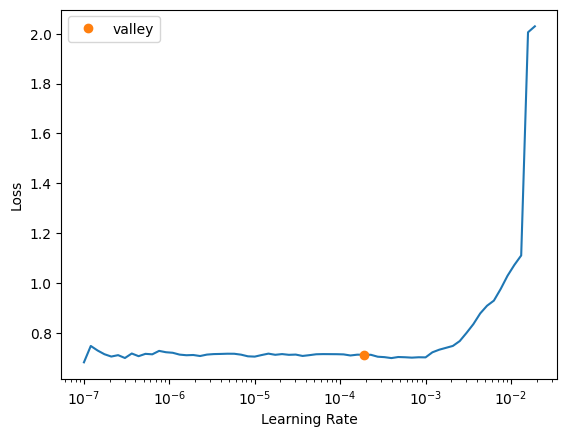

In [22]:
learn.lr_find()

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=1.3182567499825382e-06)


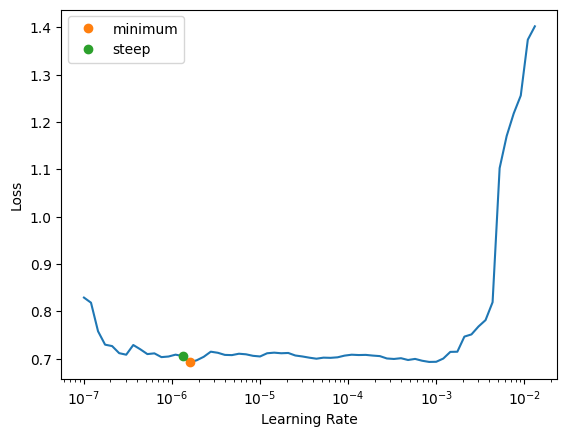

In [23]:
lr_min, lr_steep, *_ = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"SuggestedLRs(lr_min={lr_min}, lr_steep={lr_steep})")

In [24]:
lr_range = [1e-7, 5e-7, 1e-6]

In [25]:
for lr in lr_range:
  learn.fit(2, base_lr=lr)  # Fine-tune for 2 epochs with current learning rate
  print(f"Learning Rate: {lr}, Training Loss: {learn.recorder.losses[-1]}, Validation Loss: {learn.recorder.val_losses[-1]}")

TypeError: Learner.fit() got an unexpected keyword argument 'base_lr'

In [26]:
for lr in lr_range:
    learn.learn(lr=lr)  # Set learning rate for current run
    learn.fit(epochs=2)  # Fine-tune for 2 epochs
    print(f"Learning Rate: {lr}, Training Loss: {learn.recorder.losses[-1]}, Validation Loss: {learn.recorder.val_losses[-1]}")


AttributeError: 'DynamicUnet' object has no attribute 'learn'

In [27]:
learn.fine_tune(6, base_lr=1e-5)

epoch,train_loss,valid_loss,time
0,0.712351,0.974004,00:01


epoch,train_loss,valid_loss,time
0,0.711386,0.972966,00:01
1,0.711055,0.972722,00:01
2,0.709846,0.971782,00:01
3,0.708786,0.970138,00:01
4,0.708132,0.970479,00:01
5,0.707350,0.969495,00:01


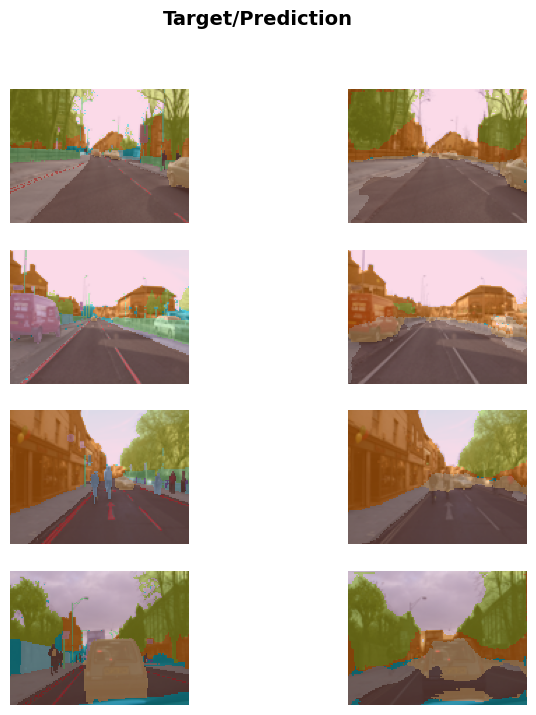

In [28]:
learn.show_results(max_n=4, figsize=(8, 8))

In [29]:
interp = SegmentationInterpretation.from_learner(learn)
cm = interp.plot_confusion_matrix(figsize=(8, 8))
print(f"IoU: {cm.iou}")
print(f"Precision: {Precision(cm.true_pos, cm.false_pos)}")
print(f"Recall: {Recall(cm.true_pos, cm.false_neg)}")

AttributeError: 'SegmentationInterpretation' object has no attribute 'plot_confusion_matrix'

In [30]:
from fastai.vision.all import ConfusionMatrix, Recall, Precision


ImportError: cannot import name 'ConfusionMatrix' from 'fastai.vision.all' (/usr/local/lib/python3.10/dist-packages/fastai/vision/all.py)

In [31]:
learn.add_regularizer(size=learn.layers[-2:], l2=0, drop_func=DropConnect(p=0.5))

AttributeError: 'DynamicUnet' object has no attribute 'add_regularizer'

In [32]:
# Example: setting weight decay to 0.001
learn.wd = 0.001


In [33]:
# Example fine-tuning with 2 epochs
learn.fit(2)


epoch,train_loss,valid_loss,time
0,0.757696,1.173753,00:01
1,0.779413,1.147100,00:01


In [35]:
learn.wd = 1e-6  # Start with a smaller weight decay


In [37]:
learn.fit(6)

epoch,train_loss,valid_loss,time
0,0.683396,1.043794,00:02
1,0.657761,0.913375,00:01
2,0.620886,0.941930,00:01
3,0.597338,0.943218,00:01
4,0.573804,0.885382,00:01
5,0.547744,0.936433,00:01


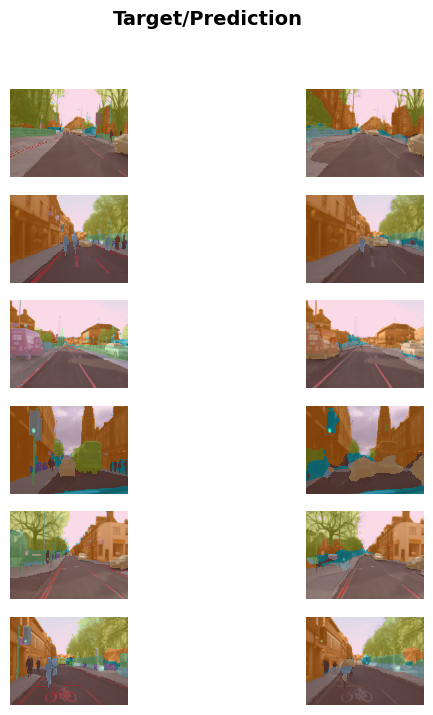

In [38]:
learn.show_results(max_n=6, figsize=(7,8))

In [39]:
# Assuming you've incorporated the changes and fine-tuned

print(f"Train Loss: {learn.recorder.losses[-1]}")
print(f"Validation Loss: {learn.recorder.val_losses[-1]}")

# Compare these values with the previous losses you recorded


IndexError: list index out of range

SuggestedLRs(valley=6.30957365501672e-05)

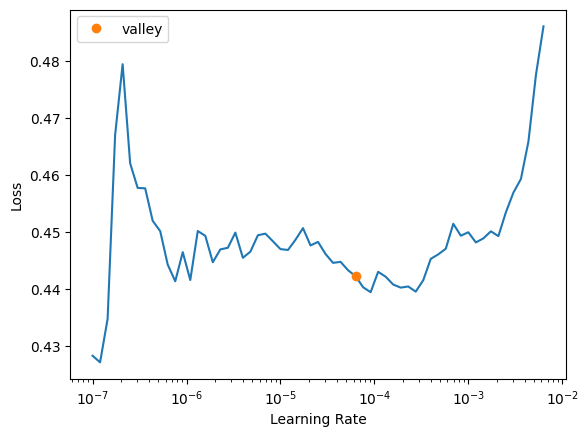

In [40]:
learn.lr_find()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)


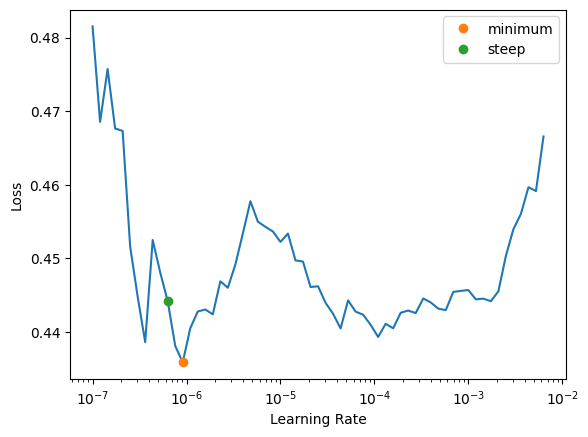

In [41]:
lr_min, lr_steep, *_ = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"SuggestedLRs(lr_min={lr_min}, lr_steep={lr_steep})")